In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

df = pd.read_csv("Practico_01_counts.csv")
# df.describe()


/home/mlopez/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
from collections import Counter
import seaborn as sns

a = Counter(df["insectos"])
a

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Counter({2: 11, 3: 15, 5: 7, 1: 5, 4: 5, 8: 2, 6: 1, 0: 3, 7: 1})

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import uniform

In [4]:
# poisson.pmf(df["insectos"], mu=1)
# poisson.logpmf(df["insectos"], mu=1)
# sum(poisson.logpmf(df["insectos"], mu=1))

def LPoisson (d, mu=1):
    return sum(poisson.logpmf(d, mu=mu))



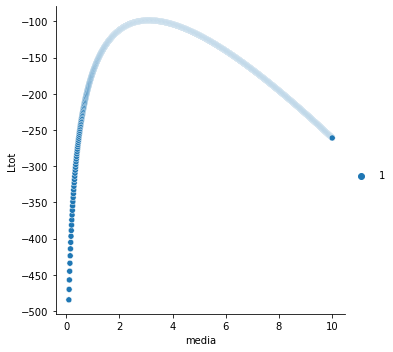

In [5]:
exp = pd.DataFrame.from_dict({"media": np.linspace(start=0.1, stop=10, num=990)})

exp["Ltot"] = exp["media"].apply(lambda x: LPoisson(df["insectos"], x))
exp

sns.relplot(data=exp, x="media", y="Ltot", hue=1)



In [11]:
## slide 21

nrow= 500
# df_1  = pd.DataFrame([None for _ in range(nrow)], columns=["mean"])
# df_1.loc[0, "mean"] = 3.5

means = [3.5]

for i in range(nrow):
    current = means[i]
    prop = norm(loc=current, scale=0.5).rvs()

    # verosimilitud
    post_prop = LPoisson(df["insectos"], prop) + lognorm(prop, loc=0.5, scale=0.5).rvs()
    post_current = LPoisson(df["insectos"], current) + lognorm(current, loc=0.5, scale=0.5).rvs()

    r = min(1, np.exp(post_prop)/np.exp(post_current))
    cand = prop if r > uniform.rvs() else current
    means.append(cand)

# means

/tmp/ipykernel_4468/2374595558.py:17: RuntimeWarning: overflow encountered in exp
  r = min(1, np.exp(post_prop)/np.exp(post_current))


[3.5,
 3.5,
 3.5,
 3.5847739585841345,
 3.5633907932563176,
 3.5633907932563176,
 3.5633907932563176,
 3.5633907932563176,
 3.288682773032525,
 3.3621699600695574,
 3.3621699600695574,
 2.944790727025226,
 2.944790727025226,
 2.944790727025226,
 3.0927205506287048,
 3.0927205506287048,
 3.0927205506287048,
 3.0927205506287048,
 3.0927205506287048,
 3.0614803550901577,
 3.0614803550901577,
 3.0614803550901577,
 3.0614803550901577,
 3.0614803550901577,
 3.0559862901965467,
 3.3641049403480414,
 3.3641049403480414,
 3.3641049403480414,
 3.6314953881982386,
 3.366638900629563,
 3.366638900629563,
 3.2390727462538966,
 3.8203117801734012,
 4.235344719604427,
 3.384180189215093,
 3.225199385470648,
 3.225199385470648,
 3.225199385470648,
 3.225199385470648,
 3.225199385470648,
 3.0182583089081136,
 3.0182583089081136,
 3.0182583089081136,
 2.905952876876055,
 2.905952876876055,
 3.1468748439196053,
 3.487298246678911,
 3.476109331943874,
 3.019512608632003,
 3.019512608632003,
 2.89985539786

(array([ 10.,  25., 105., 139., 112.,  69.,  13.,  14.,   8.,   6.]),
 array([1.8016957 , 2.19291706, 2.58413843, 2.97535979, 3.36658115,
        3.75780252, 4.14902388, 4.54024524, 4.93146661, 5.32268797,
        5.71390933]),
 <BarContainer object of 10 artists>)

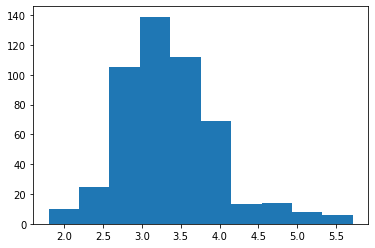

In [15]:
plt.hist(means)